## Análise de Séries Temporais em Python
Problema de Negócio:
Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas de Janeiro/2024?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando os Dados 

In [4]:
df_dsa = pd.read_csv('dataset.csv')

In [5]:
df_dsa.shape

(365, 2)

In [6]:
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [7]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [8]:
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


## Pré-Processamento dos Dados

In [9]:
#Valor mínimo da coluna data
df_dsa['Data'].min()

'2023-01-01'

In [10]:
#Valor máximo da coluna data
df_dsa['Data'].max()

'2023-12-31'

In [12]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [13]:
#Convertendo a coluna data para o tipo datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [14]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [15]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [17]:
#Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [18]:
type(serie_temporal)

pandas.core.series.Series

In [19]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [20]:
#Fornece a frequência da série temporal (diária)
serie_temporal = serie_temporal.asfreq('D')

In [21]:
serie_temporal 

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise Exploratória

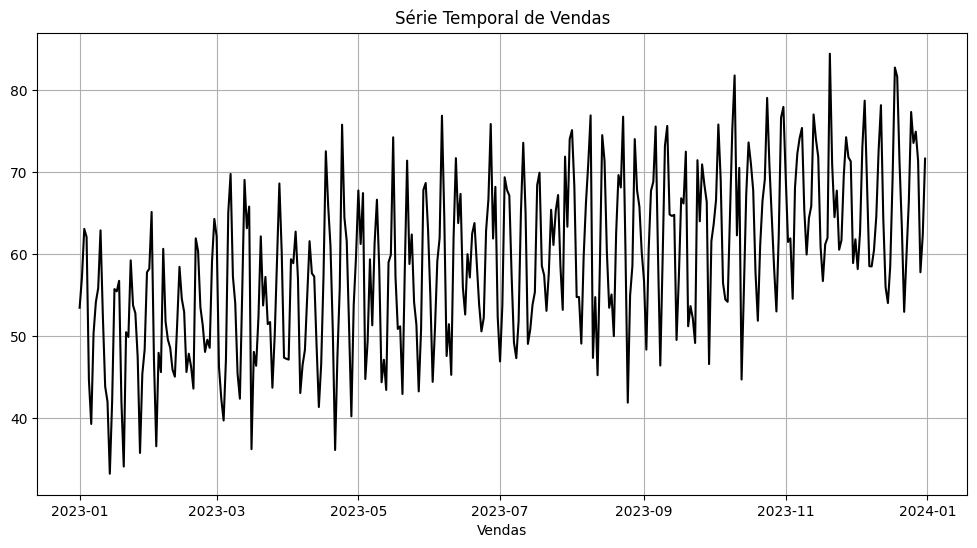

In [23]:
#Cria o gráfico de série temporal (sem formatação)
plt.figure(figsize = (12,6))
plt.plot(serie_temporal, color = 'k')
plt.xlabel('Data')
plt.xlabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

## Suavização Exponencial